# Description of the Dataset
* **SourceIP:** A numerical representation of the source IP address.
* **DestinationIP:** A numerical representation of the destination IP address.
* **SourcePort:** A numerical value representing the port number of the source.
* **DestinationPort:** A numerical value representing the port number of the destination.
* **Protocol:** Numerical or encoded representation of the network protocol (e.g., TCP, UDP).
* **BytesSent:** Number of bytes sent from the source to the destination.
* **BytesReceived:** Number of bytes received by the source from the destination.
* **PacketsSent:** Number of packets sent from the source to the destination.
* **PacketsReceived:** Number of packets received by the source from the destination.
* **Duration:** The duration of the network connection or transaction.
* **IsAnomaly:** A binary indicator where 0 indicates normal traffic and 1 indicates an anomaly or suspicious traffic pattern.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [ ]:
# Read the data
network_data = pd.read_csv('/content/synthetic_network_traffic.csv')
network_data

,SourceIP,DestinationIP,SourcePort,DestinationPort,Protocol,BytesSent,BytesReceived,PacketsSent,PacketsReceived,Duration,IsAnomaly
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,0
1,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304,0
2,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,0
3,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,0
4,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040,0
...,...,...,...,...,...,...,...,...,...,...,...
999995,0.002725,-0.638022,0.840857,1.306959,-0.992010,-0.210795,0.226693,0.948210,0.815519,0.240544,0
999996,-0.830555,-0.545716,-1.130178,0.021732,-0.565860,1.438171,0.621305,-1.768177,1.461799,-0.668388,0
999997,0.047510,-1.310967,0.173328,-1.367077,1.003435,-0.202177,-0.112733,-0.206338,0.086761,-1.954908,0
999998,-0.242768,-0.893310,-0.197664,-1.316390,-0.047899,-0.161381,-0.682240,-0.011741,0.684703,-0.019483,0


In [ ]:
# Number of unique values in "mic" column
unique_mic_count = network_data['IsAnomaly'].nunique()
unique_mic_count

# List of unique values in "mic" column
unique_mic_values = network_data['IsAnomaly'].unique()
unique_mic_values

# Count of each unique value in "mic" column
value_counts = network_data['IsAnomaly'].value_counts()
value_counts

,count
IsAnomaly,
0,995000
1,5000


In [ ]:
# Dataset information
network_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   SourceIP         1000000 non-null  float64
 1   DestinationIP    1000000 non-null  float64
 2   SourcePort       1000000 non-null  float64
 3   DestinationPort  1000000 non-null  float64
 4   Protocol         1000000 non-null  float64
 5   BytesSent        1000000 non-null  float64
 6   BytesReceived    1000000 non-null  float64
 7   PacketsSent      1000000 non-null  float64
 8   PacketsReceived  1000000 non-null  float64
 9   Duration         1000000 non-null  float64
 10  IsAnomaly        1000000 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 83.9 MB


In [ ]:
#Descriptive statistics for numerical columns
network_data.describe()

,SourceIP,DestinationIP,SourcePort,DestinationPort,Protocol,BytesSent,BytesReceived,PacketsSent,PacketsReceived,Duration,IsAnomaly
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,-0.000645,0.000899,-0.002857,0.001966,-0.000958,-0.001099,0.001715,0.000153,0.001019,-0.000832,0.005000
std,1.000721,0.999597,1.000583,1.000004,0.999299,1.000560,1.000138,0.999976,0.999260,0.999992,0.070534
min,-4.980146,-4.841791,-4.829436,-4.644419,-4.950266,-4.630858,-4.462969,-4.564944,-5.195261,-4.625258,0.000000
25%,-0.675493,-0.672789,-0.679471,-0.672742,-0.675323,-0.676730,-0.671568,-0.674591,-0.673667,-0.676727,0.000000
50%,-0.000708,-0.000433,-0.003061,0.001888,-0.000974,-0.001224,0.002324,0.000994,0.001513,-0.000485,0.000000
75%,0.672675,0.676014,0.670509,0.676370,0.671899,0.674718,0.677180,0.675133,0.675576,0.673657,0.000000
max,5.032374,4.984215,4.565550,4.748345,4.920315,5.220045,5.033805,4.827623,4.795172,4.913122,1.000000


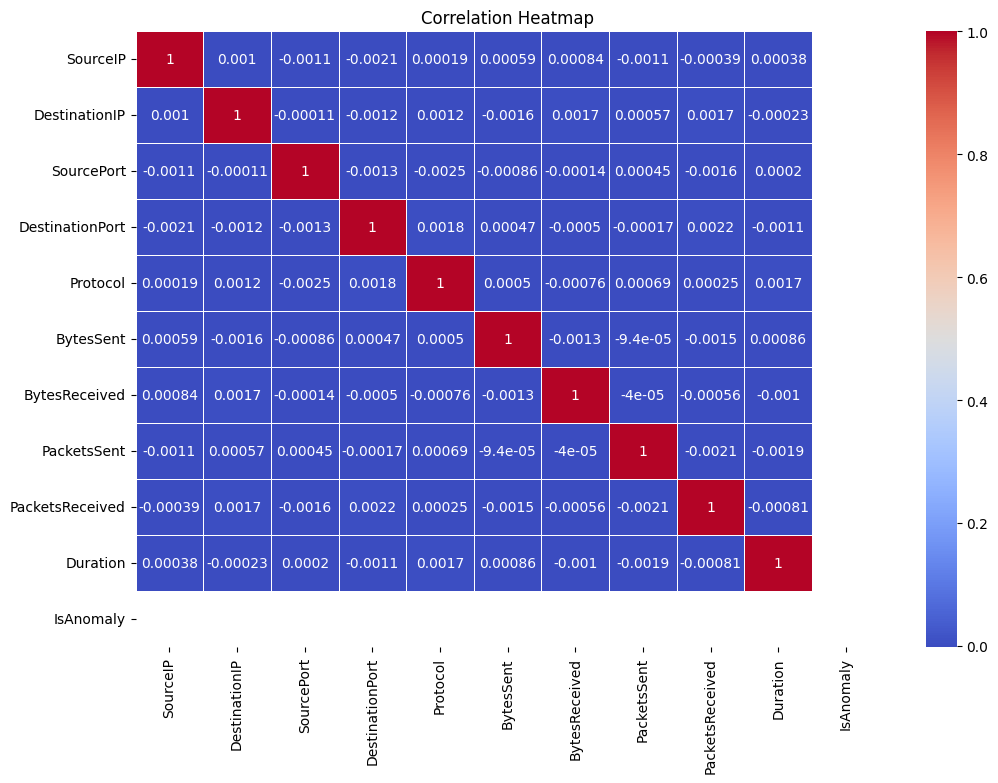

In [ ]:
# Correlation Heatmap
def plot_correlation_heatmap(data):
  # Select only numeric columns for correlation calculation
  numeric_data = network_data_cleaned.select_dtypes(include=[np.number])

  plt.figure(figsize=(12, 8))
  correlation_matrix = numeric_data.corr()
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
  plt.title('Correlation Heatmap')
  plt.show()

plot_correlation_heatmap(network_data_cleaned)

# Data Cleaning

In [ ]:
# Check for null values in each column
null_values_count = network_data.isnull().sum()
null_values_count

,0
SourceIP,0
DestinationIP,0
SourcePort,0
DestinationPort,0
Protocol,0
BytesSent,0
BytesReceived,0
PacketsSent,0
PacketsReceived,0
Duration,0


In [ ]:
# Check for duplicate rows
duplicate_rows = network_data[network_data.duplicated()]
duplicate_rows

,SourceIP,DestinationIP,SourcePort,DestinationPort,Protocol,BytesSent,BytesReceived,PacketsSent,PacketsReceived,Duration,IsAnomaly


In [ ]:
# # Check for outliers
# def detect_outliers(df):
#     outlier_indices = []
#     for column in df.select_dtypes(include=['float64', 'int64']).columns:
#         Q1 = df[column].quantile(0.25)
#         Q3 = df[column].quantile(0.75)
#         IQR = Q3 - Q1
#         outlier_list_col = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)].index
#         outlier_indices.extend(outlier_list_col)
#     outlier_indices = list(set(outlier_indices))  # Remove duplicates
#     return df.loc[outlier_indices]

# outliers = detect_outliers(network_data)
# outliers

In [ ]:
# # Get outlier indices
# outlier_indices = outliers.index

# # Remove outliers from the original DataFrame
# network_data_cleaned = network_data.drop(index=outlier_indices)

# print("Original DataFrame shape:", network_data.shape)
# print("Cleaned DataFrame shape:", network_data_cleaned.shape)

In [ ]:
# Save the cleaned DataFrame to a CSV file
cleaned_file_path = '/content/network_data_cleaned.csv'
network_data.to_csv(cleaned_file_path, index=False)